# Cohort Analysis 📅

## Introduction to Cohort Analysis
El cohort analysis ayuda a profundizar en los hábitos de compra de los clientes y descrubrir información procesable. <br>

¿Qué es el cohort analysis?
- Es una herramienta de análisis descriptivo, agrupa a los clientes en cohortes mutuamente excluyentes, que luego se miden a lo largo del tiempo.
- El análisis de cohortes proporciona información más profunda que las vanity metrics. 
- Ayuda a comprender mejor las tendencias de alto nivel al **proporcionar información sobre las métricas tanto del producto como del ciclo de vida del cliente**.


### Tipos de Cohorts
- **Time cohorts**: Son clientes que se suscribieron a un producto o servicio durante un periodo de tiempo determinado. El análisis de estos cohorts muestra el comportamiendo de los clientes dependiendo del momento en el que comenzaron a utilizar los productos o servicios de la empresa. El tiempo puede ser mensual o trimestral, incluso diario.
- **Behavior cohorts**: Son clientes que compraron un producto o se suscribieron a un servicio en el pasado. Agrupa a los clientes por el tipo de producto o servicio que contrataron. Los clientes que se suscribieron a los servicios de nivel básico pueden tener necesidades diferentes a las de aquellos que se inscribieron en servicios avanzados
- **Size cohorts**: Se refieren a los distintos tamaños de clientes que compran los productos o servicios de la empresa. Esta categorización se puede basar en la cantidad de gasto en algún período de tiempo después de adquisición, o el tipo de producto en el que el cliente gastó la mayor parte del monto de su pedido en algún período de tiempo.

### Elementos del Cohort Analysis
Los datos del cohort analysis normalmente tienen el formato de una tabla dinámica. El row value (index) representa el cohort, los nombres de las columnas representan los periodos (meses,semanas,días,horas,minutos,etc.) desde la adquisición. Y los valores de la tabla son la métrica a analizar (i.e. Clientes activos, rentabilidad_promedio,etc.).
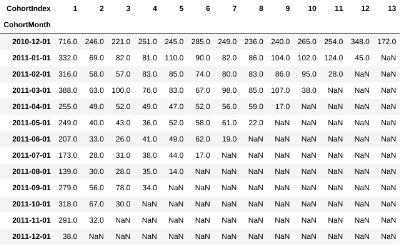

## Time Cohorts
El tipo de cohort análisis más popular.
Los time cohorts agrupan a los clientes en el momento en que realizaron su primera actividad.

### Ejercicio - Time Cohorts
Segmentaremos a los clientes en cohorts de adquisición en función del mes que realizaron su primera compra. Le asignaremos el indice de cohort a cada compra y marcaremos cada transacción en función de su período de tiempo relativo desde la primera compra. En este ejemplo, calcularemos el número de meses desde la adquisición. En el siguiente paso calcularemos métricas como la retención o el valor del gasto promedio y crearemos un mapa de calor.


#### Import & Read

In [1]:
# Importamos el Online Retail Dataset (un set muy popular para segmentación) del UCI ML Repository (un repositorio muy popular para practicar)
# Link: https://archive.ics.uci.edu/dataset/352/online+retail
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('Datasets/Online_Retail.xlsx')
df = df.loc[~df['CustomerID'].isna()].reset_index()
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
#df['InvoiceMonth'].loc[df['InvoiceMonth'].isna()]

#### Cohort Creation

Agregamos el mes de adquisición, con el cual se definen los cohorts.

In [3]:
# Primero, creamos una función que trunca un objeto de fecha al primer día del mes.
def get_month(x): 
    return dt.datetime(x.year,x.month,1)

# Aplicamos la función para crear la columna InvoiceMonth que tiene la fecha truncada por mes.
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)

# Creamos un groupby object con customerID y usamos la columna InvoiceMonth para la manipulación adicional.
grouping = df.groupby('CustomerID')['InvoiceMonth'] #Tenemos el groupby object, pero falta definir el agregado

#Utilizamos Transform junto con la función min para asignar el valor más pequeño a cada cliente.
df['CohortMonth'] = grouping.transform('min') # Con transform podemos extraer el agregado como columna, puedes usar funciones como len, min, max, sum, np.sqrt, np.exp, etc.

df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


Creamos la diferencia de tiempo desde la adquisición hasta el final del tiempo analizado.

In [4]:
# Creamos una función auxiliar para extraer año, mes y día de un objeto datetime en valores enteros.
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Obtenemos el año y el mes de adquisición y de cohorte
invoice_year, invoice_month, _ = get_date_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(df, 'CohortMonth')

# Calculamos la diferencia en años y en meses de ambas.
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

#Calculamos y definimos el offset.
df['CohortIndex'] = years_diff * 12 + months_diff + 1 # El 1 al final es para que el primer mes se marque como 1 en lugar de 0 para facilitar la interpretación

# CAMBIO
df = df.loc[~df['CohortIndex'].isna()]
df['CohortIndex'] = df['CohortIndex'].astype(int)
# CAMBIO

df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


Calculamos el número de clientes activos mensualmente para cada cohort

In [10]:
# Creamos un groupby object con CohortMonth y CohortIndex
grouping = df.groupby(['CohortMonth','CohortIndex'])

# Contamos el número de clientes en cada grupo aplicando la función pandas nunique()
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

# Reseteamos el index
cohort_data = cohort_data.reset_index()

# lo dejamos solo en formato Mes, por temas de estética.
cohort_data['CohortMonth'] = pd.to_datetime(cohort_data['CohortMonth']).dt.to_period('M').astype(str)

# Creamos el pivot table
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cohort Metrics

Métricas comerciales para estas cohorts de clientes. <br>
Con los clientes activos del Cohort anterior, podemos calcular la retención de clientes. <br>
Luego calcularemos la cantidad promedio de compra

##### Retención
La retención mide cuántos clientes de cada grupo han regresado en los meses siguientes.

In [11]:
# Paso 1. Seleccionar la primera columna que es el número total de clientes en el cohort.
cohort_sizes = cohort_counts.iloc[:,0] # Ubicamos la primer columna de la pivot table

# Paso 2. Calcular el ratio de cuántos de estos clientes estuvieron activos en los meses siguientes. Osea, la tasa de retención.
    # Precaución: Verá que la retención del primer mes, por definición, será del 100% para todos los cohorts. 
    # Esto se debe a que la cantidad de clientes activos en el primer mes es el tamaño del cohort
retention = cohort_counts.divide(cohort_sizes, axis = 0) # axis = 0 provoca que la división entre la columna cohort_counts, se ejecute a lo largo de la fila

# Paso 3. Redondeamos el ratio a 3 dígitos y multiplicamos por 100 para que luzca como porcentaje
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Cantidad Promedio
Cantidad promedio es otra métrica muy útil a la hora de realizar un cohort, pues además de ver la disminución absoluta como vimos en el anterior caso, esta métrica te muestra el comportamiento de cada cliente promedio por cohort.

In [12]:
# Creamos un groupby object con CohortMonth y CohortIndex
grouping = df.groupby(['CohortMonth','CohortIndex'])

# Sacamos un promedio de la Quantity
cohort_data = grouping['Quantity'].mean()

# Reseteamos el index
cohort_data = cohort_data.reset_index()

# Creamos el pivot table
average_quantity = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='Quantity')

# Redondeamos a 1 decimal
average_quantity.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.0,14.6,15.0,14.8,12.9,14.3,15.2,14.8,16.7,16.7,17.3,12.8,14.8
2011-01-01,10.0,12.6,12.3,10.9,12.2,14.9,14.2,14.4,11.4,9.9,9.1,9.5,NaN
2011-02-01,10.8,12.1,18.6,12.0,11.1,11.4,13.3,12.4,10.3,11.9,12.6,NaN,NaN
2011-03-01,9.8,9.9,12.2,9.5,13.6,12.3,13.2,12.2,10.5,8.9,NaN,NaN,NaN
2011-04-01,9.8,10.1,9.4,11.6,11.5,8.2,9.7,9.3,7.3,NaN,NaN,NaN,NaN
2011-05-01,10.9,9.0,13.9,11.8,10.9,8.7,10.1,7.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,13.7,10.5,13.3,10.2,9.8,9.3,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.7,7.1,7.8,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,9.9,6.0,5.3,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Cohort Visualization

Visualzaciones potentes de análisis de Cohorts. <br>
La forma más efectiva de visualiza y analizar datos de análisis de cohorts es a través de un mapa de calor. <br>


**Ventajas del Mapa de Calor**:
- Es la forma más sencilla de visualizar el cohort analysis
- Incluye data y visuales
- Sólo necesitas unas pocas líneas de código con la librería seaborn (sns)

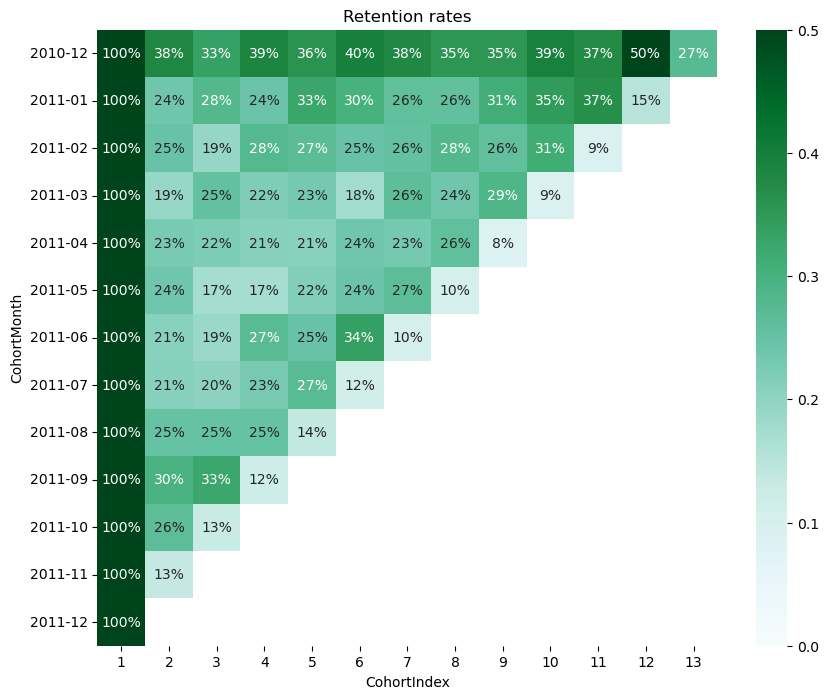

In [13]:
# Creamos una figura vacía con un ancho y una altura predefinidos en pulgadas.
plt.figure(figsize=(10, 8))

# Le asignamos un título al gráfico
plt.title('Retention rates')

# Creamos el heatmap.
sns.heatmap(data = retention, # Data a visualizar
            annot = True, # Que se vean los números en el heatmap
            fmt = '.0%', # Definimos el formato de los números como porcentaje con un decimal
            vmin = 0.0, # Anclamos el valor mínimo de color
            vmax = 0.5, # Anclamos el valor máximo de color. Con eso nos aseguramos que los outliers no afecten la visualización
            cmap = 'BuGn' # Definimos la paleta de colores del colormap, podemos encontrar muchas otras paletas de colores en la documentación o crear las nuestras
           )

# Nos traemos la tabla de retención que hicimos anteriormente
plt.show()